In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#  del array_col
%run '../code/constants.py'
%run '../code/evaluate.py'
%run '../code/helpers'

In [3]:
fp = path + '/' + 'CBB_2018.pkl'
mongo_df = pd.read_pickle(fp)

In [4]:
keeps = ['run_time_ms', 'extra_variables.clarity_cbb_score2'
         , 'third_party.clarity_cbb.clear-bank-behavior.cbb-score', 'decision_engine.decision']
run_time_ms_filter = 1514793600000 #Jan 1st 2018
rename_dict = {'extra_variables.clarity_cbb_score2': 'score_2'
              , 'third_party.clarity_cbb.clear-bank-behavior.cbb-score': 'score_1'
              , 'decision_engine.decision': 'decision'}

In [5]:
df = mongo_df.loc[mongo_df.run_time_ms > run_time_ms_filter, keeps].rename(
    columns=rename_dict)
print (df.shape)

(37191, 4)


In [6]:
score_2 = df.score_2[pd.notnull(df.score_2)]
df.score_2.describe()

count    30259.000000
mean       746.629102
std         79.089708
min        179.000000
25%        713.000000
50%        774.000000
75%        803.000000
max        890.000000
Name: score_2, dtype: float64

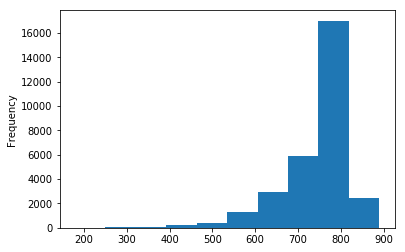

In [7]:
score_2.plot(kind='hist')

In [8]:
score_1 = df.score_1.apply(int_conv)
score_1 = score_1[pd.notnull(score_1)]
print (score_1.describe())

count    30259.000000
mean       836.732080
std        114.496202
min         92.000000
25%        825.000000
50%        871.000000
75%        895.000000
max        990.000000
Name: score_1, dtype: float64


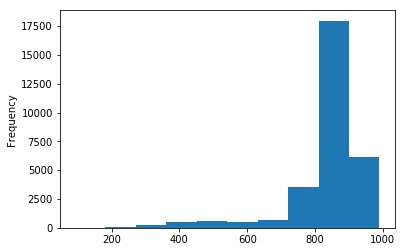

In [9]:
score_1.plot(kind='hist')

In [10]:
grps = cbb_grps
array = score_2
array2 = score_1
to_have = [ratio_numbers(array, cut) for cut in grps]
array2_sorted = sort_desc(array2)
# return [array2_sorted[idx] for idx in to_have]

In [11]:
to_have

[29518, 28427, 26825, 23422, 21592]

In [19]:
score_1_cuts = array_col(score_2, cbb_grps, score_1)

In [20]:
score_1_cuts

[439.0, 605.0, 758.0, 820.0, 836.0]

In [21]:
num_score_2 = [sum(score_2 >= grp) for grp in cbb_grps]
print (num_score_2)

[29518, 28427, 26825, 23422, 21592]


In [22]:
num_score_1 = [sum(score_1 >= grp) for grp in score_1_cuts]
print (num_score_1)

[29531, 28427, 26845, 23444, 21619]


In [23]:
29518/37191

0.7936866446183216

In [24]:
pd.DataFrame({'one': score_1, 'two': score_2}).corr()

one       two
one  1.000000  0.674243
two  0.674243  1.000000

In [25]:
score_2_sorted = sort_desc(score_2)

In [26]:
num_score_2_new = np.round(np.array([num_score_2[0], num_score_2[-2], num_score_2[-1]]) /1.1).astype(np.int64)
num_score_2_new

array([26835, 21293, 19629])

In [27]:
cbb_grps2 = score_2_sorted[num_score_2_new]
cbb_grps2

array([649., 728., 746.])

In [28]:
score_1_cuts_new = array_col(score_2, cbb_grps2, score_1)

In [29]:
score_1_cuts_new

[757.0, 838.0, 850.0]

In [30]:
#checking
score_2_sorted[num_score_2[0]]

539.0

In [31]:
sum((score_2_sorted > 540) & (score_2_sorted < 600))

1081